## <center>Simulação do resultado de uma pesquisa sobre o título de Capeão do Mundo em 1951 pelo time do Palmeiras</center>
#### Desde 2014 quando a FIFA declarou oficialmente o Palmeiras como Campeão Mundial em 1951, esta discussão só cresceu no Brasil, no meio dos fâs do futebol.
#### Creating a .csv file based on a simulated collects of votes for a survey entitled "Is it correct to recognize SE Palmeiras as World Champions for winning the title of the Taça Rio Tornment at the year of 1951, since FIFA has manifested officialy this agreement on 2014. ". 
Once the dataset was created, there will be presented the data analysis, with the porpose to prove votes changes accord to the followed aspects:
- date of vote;
- the favorite brazillian futbol club of the voter;
- the age of the voter, and;
- the genre of the voter.


- 1a. Etapa: criar um arquivo .csv usando Python, que receberá os dados gerados por algorítimo que irá simular a coleta de resultados uma pesquisa de opnião real. Sobre o modelo de simulação, vale considerar as seguintes observações:
    + não será objetivo do algorítimo replicar o resultado que uma pesquisa real teria;
    + as respostas da pesquisa irão variar de acordo com os seguintes parâmetros de quem vota: o clube favorito, a idade, o sexo e a data.

- 2a. Etapa: analisar os dados gerados, explorando as bibliotecas pandas, matplotlib e seaborn.

- 3a. Etapa: simular exercício de machine learning com o uso do sykitlearn, em aprendizagem supervisionada.

    Colunas:
    
    id: identificador único do voto
    data: data do voto
    voto: Se concorda com o Mundial do Palmeiras, se discorda ou se não sabe responder
    clube: Clube de coração do individuo que vota, Palmeiras, SSPCOR(Santos, São Paulo ou Corinthians) ou Outros.
    sexo: gênero(Masculino ou Feminino) do indivíduo que vota
    idade: idade do indivíduo que vota, de 16 a 85

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from random import sample, randint
from itertools import count
from datetime import datetime, timedelta, date
import time

### Criando o dataset / Creating the dataset

In [ ]:
# listas para random.sample e outros / lists for random.sample and other stuffs

# lista para sample de aleatório
aleatorio = ['Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',             
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Não sabe', 'Não sabe']

# lista para sample de torcedores de São Paulo FC, Santos FC e SC Corinthians
sspcor = ['Concorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Não sabe']

# lista para sample de torcedores antigos, mais de 65 anos
antigos = ['Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda', 'Discorda',
             'Discorda', 'Discorda', 'Discorda', 'Não sabe']

# lista para sample de palmeirenses
palmeirense = ['Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda', 'Concorda',
             'Concorda', 'Concorda', 'Discorda', 'Não sabe']

# lista para sample de feminino
feminino = ['Concorda', 'Concorda', 'Concorda', 'Concorda', 'Discorda', 'Discorda', 'Discorda',                            
             'Não sabe', 'Não sabe', 'Não sabe', 'Não sabe','Não sabe', 'Não sabe', 'Não sabe', 'Não sabe',]

# lista para pop de tentativas que evoluem com o tempo
vezes_discorda = [0,1,2,1,4,3,5,30,5,16,10,15]
vezes_concorda = [-25,-25,-20,-15,-15,-15,-4,-1,0,1,2,3,4]
vezes_naosabe = [0,1,1,0,2,5,7,10,15,25,30,45]

# genre
genero = ['Masculino', 'Feminino']

# favorit club of voter
clube = ['Palmeiras','Palmeiras', 'Palmeiras', 'Palmeiras', 
         'SSPCOR', 'SSPCOR', 'SSPCOR', 'SSPCOR', 'SSPCOR', 'SSPCOR',
         'Outro', 'Outro', 'Outro', 'Outro', 'Outro','Outro', 'Outro', 'Outro']

# daily quantity of votes
votos_diarios_qtd = [30, 30, 20, 35, 50, 55, 30, 40]

# others
var_date = date(year=2015, month=1, day=1)
end_date = date(year=2020, month=12, day=31)
ct = count(start=0, step=1)
# columns names
colunas = 'id,data,voto,clube,sexo,idade\n'

In [ ]:
# função que define o voto individual / function that defines an individual vote
def voto_individual(xdiscorda, xconcorda, xnaosabe): 
    cb = sample(clube, 1)[0]
    sexo = sample(genero, 1)[0]
    idade = randint(16,85)
    if cb == 'Palmeiras':
        voto = sample(palmeirense, 1)[0]
    elif cb == 'SSPCOR':
        voto = sample(sspcor, 1)[0]
        if xconcorda > 0:
            while voto != 'Concorda':
                    voto = sample(aleatorio, 1)[0]        
                    xconcorda -= 1
                    if xconcorda == 0:
                        break          
        else:            
            while voto != 'Discorda':
                if xconcorda == 0:
                    break
                if xconcorda <0:
                    xconcorda += 1
                    voto = sample(aleatorio, 1)[0]  
    else:
        if idade >= 65:
            if sexo == 'Feminino':
                voto = sample(feminino, 1)[0]
                while voto != 'Não sabe':
                    if xnaosabe == 0:
                        break                   
                    voto = sample(feminino, 1)[0]        
                    xnaosabe -= 1
            else:                
                voto = sample(antigos, 1)[0]
                while voto != 'Não sabe':
                    if xnaosabe == 0:
                        break                   
                    voto = sample(aleatorio, 1)[0]        
                    xnaosabe -= 1
        elif idade < 30:
            if sexo == 'Feminino':
                voto = sample(feminino, 1)[0]
                while voto != 'Não sabe':
                    if xnaosabe == 0:
                        break                   
                    voto = sample(feminino, 1)[0]        
                    xnaosabe -= 1                
            else:
                voto = sample(sspcor, 1)[0]
                while voto != 'Concorda':
                    if xdiscorda == 0:
                        break                   
                    voto = sample(aleatorio, 1)[0]        
                    xdiscorda -= 1
        else:
            if sexo == 'Feminino':
                voto = sample(feminino, 1)[0]
                while voto != 'Não sabe':
                    if xnaosabe == 0:
                        break                   
                    voto = sample(feminino, 1)[0]        
                    xnaosabe -= 1                
            else:                
                voto = sample(aleatorio, 1)[0]                
                while voto != 'Concorda':
                    if xdiscorda == 0:
                        break                    
                    voto = sample(aleatorio, 1)[0]        
                    xdiscorda -= 1
    return voto + ',' + cb + ',' + sexo + ',' + str(idade)

voto_individual(0,10,20)

In [ ]:
# gerando o arquivo .csv contendo o dataset / generating .csv file containing the dataset
inicio = datetime.now()

with open('mundial51.csv', 'w') as file:
    file.write(colunas)
    ano_count = 2015
    semestre = 0
    xdiscorda = vezes_discorda.pop()
    xconcorda = vezes_concorda.pop()
    xnaosabe = vezes_naosabe.pop()
    for i in range(2247):    
        if var_date.month != (var_date + timedelta(1)).month:
            semestre +=1
            if semestre == 6:
                semestre=0
                if len(vezes_discorda) > 0:
                    xdiscorda = vezes_discorda.pop()
                else:
                    xdiscorda = 0
                if len(vezes_concorda) > 0:
                    xconcorda = vezes_concorda.pop()
                else:
                    xconcorda = -20
                if len(vezes_naosabe) > 0:
                    xnaosabe = vezes_naosabe.pop()
                else:
                    xnaosabe = 0
        ano = 2015
        k = 0
        j = sample(votos_diarios_qtd, 1)[0]        
        while k <= j:
            line = str(next(ct)) + ',' + str(var_date) + ',' + voto_individual(xdiscorda, xconcorda, xnaosabe) + '\n'
            file.write(line)
            k += 1        
        if var_date == end_date:
            break
        var_date = var_date + timedelta(1)

fim = datetime.now()
print(fim - inicio)

### Começando a utilizar o dataset / start using the dataset

In [3]:
votos = pd.read_csv('mundial51.csv', encoding='latin-1', index_col='id')

In [4]:
votos.head()

,data,voto,clube,sexo,idade
id,,,,,
0,2015-01-01,Concorda,SSPCOR,Masculino,69
1,2015-01-01,Concorda,Palmeiras,Masculino,49
2,2015-01-01,Concorda,Palmeiras,Feminino,64
3,2015-01-01,Concorda,SSPCOR,Masculino,58
4,2015-01-01,Concorda,Outro,Masculino,62


In [5]:
votos.dtypes

data     object
voto     object
clube    object
sexo     object
idade     int64
dtype: object

In [6]:
votos.data = pd.to_datetime(votos.data)

In [7]:
votos.dtypes

data     datetime64[ns]
voto             object
clube            object
sexo             object
idade             int64
dtype: object

In [8]:
votos.describe()

,idade
count,81642.000000
mean,50.475907
std,20.204411
min,16.000000
25%,33.000000
50%,50.000000
75%,68.000000
max,85.000000


In [9]:
votos['voto'].describe()

count        81642
unique           3
top       Concorda
freq         38474
Name: voto, dtype: object

In [10]:
votos.shape

(81642, 5)

In [11]:
votos.voto.value_counts()

Concorda    38474
Discorda    24345
Não sabe    18823
Name: voto, dtype: int64

In [12]:
votos['voto'].value_counts(normalize=True)*100

Concorda    47.125254
Discorda    29.819211
Não sabe    23.055535
Name: voto, dtype: float64

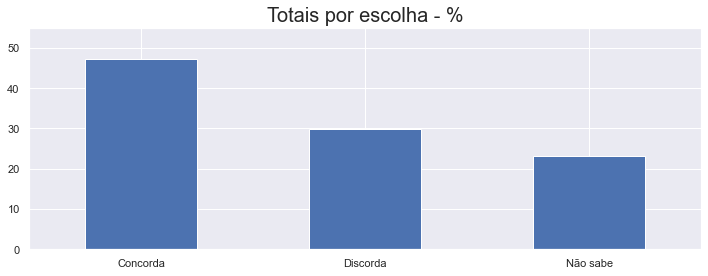

In [118]:
fig, axes = plt.subplots(figsize=(10,4))
plt.title('Totais por escolha - %', fontsize='20')
(votos['voto'].value_counts(normalize=True)*100).plot(rot=0, kind='bar', ylim=(0,55))

fig.tight_layout()

plt.show()

In [15]:
pd.crosstab(votos.voto, votos.sexo)

sexo,Feminino,Masculino
voto,,
Concorda,13450,25024
Discorda,10991,13354
Não sabe,16473,2350


In [486]:
votos.sexo.value_counts()

Feminino     40914
Masculino    40728
Name: sexo, dtype: int64

In [16]:
pd.crosstab(votos.voto, votos.clube)

clube,Outro,Palmeiras,SSPCOR
voto,,,
Concorda,14150,17229,7095
Discorda,4148,421,19776
Não sabe,18120,436,267


In [17]:
votos.groupby('voto').count()

,data,clube,sexo,idade
voto,,,,
Concorda,38474,38474,38474,38474
Discorda,24345,24345,24345,24345
Não sabe,18823,18823,18823,18823


In [18]:
def faixa_etaria(idade):
    if idade < 30:
        return 'jovem'
    elif 30 <= idade < 65:
        return 'adulto'    
    else:
        return 'idoso'

In [19]:
votos['faixa_etaria'] = votos['idade'].apply(faixa_etaria)

In [20]:
votos.head()

,data,voto,clube,sexo,idade,faixa_etaria
id,,,,,,
0,2015-01-01,Concorda,SSPCOR,Masculino,69,idoso
1,2015-01-01,Concorda,Palmeiras,Masculino,49,adulto
2,2015-01-01,Concorda,Palmeiras,Feminino,64,adulto
3,2015-01-01,Concorda,SSPCOR,Masculino,58,adulto
4,2015-01-01,Concorda,Outro,Masculino,62,adulto


In [21]:
pd.crosstab(votos.voto, votos.faixa_etaria)

faixa_etaria,adulto,idoso,jovem
voto,,,
Concorda,20811,9661,8002
Discorda,11435,7969,4941
Não sabe,8618,6826,3379


In [22]:
nao_palmeirense = votos[votos['clube'] != 'Palmeiras']

In [23]:
pd.crosstab(nao_palmeirense.voto, nao_palmeirense.faixa_etaria)

faixa_etaria,adulto,idoso,jovem
voto,,,
Concorda,12175,4513,4557
Discorda,11216,7849,4859
Não sabe,8396,6704,3287


In [24]:
clube_outros = votos[(votos['clube'] != 'Palmeiras') & (votos['clube'] != 'SSPCOR')]

In [25]:
pd.crosstab(clube_outros.voto, clube_outros.faixa_etaria)

faixa_etaria,adulto,idoso,jovem
voto,,,
Concorda,8686,2337,3127
Discorda,1398,1870,880
Não sabe,8263,6627,3230


In [26]:
pd.crosstab(clube_outros.voto, clube_outros.sexo)

sexo,Feminino,Masculino
voto,,
Concorda,1290,12860
Discorda,931,3217
Não sabe,16122,1998


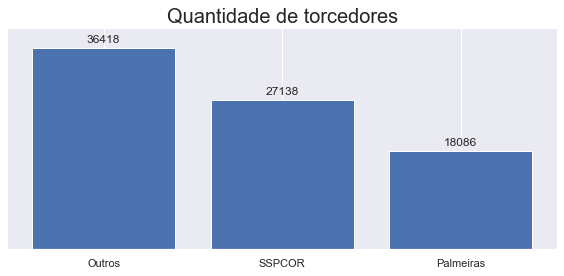

In [112]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
plt.title('Quantidade de torcedores', fontsize='20')
ax.set_ylim(500,40000)
ax.yaxis.set_visible(False)
plotx = plt.bar(['Outros', 'SSPCOR', 'Palmeiras'], votos['clube'].value_counts())

def autolabel(rects):    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(plotx)

fig.tight_layout()

plt.show()


In [118]:
votos['clube'].value_counts()

Outro        36418
SSPCOR       27138
Palmeiras    18086
Name: clube, dtype: int64

## <center>- - -</center>

In [30]:
vdata = votos.set_index('data')
vdata.head()

,voto,clube,sexo,idade,faixa_etaria
data,,,,,
2015-01-01,Concorda,SSPCOR,Masculino,69,idoso
2015-01-01,Concorda,Palmeiras,Masculino,49,adulto
2015-01-01,Concorda,Palmeiras,Feminino,64,adulto
2015-01-01,Concorda,SSPCOR,Masculino,58,adulto
2015-01-01,Concorda,Outro,Masculino,62,adulto


In [31]:
vdata['ano'] = vdata.index.year
vdata['mes'] = vdata.index.month

In [32]:
vdata.head()

,voto,clube,sexo,idade,faixa_etaria,ano,mes
data,,,,,,,
2015-01-01,Concorda,SSPCOR,Masculino,69,idoso,2015,1
2015-01-01,Concorda,Palmeiras,Masculino,49,adulto,2015,1
2015-01-01,Concorda,Palmeiras,Feminino,64,adulto,2015,1
2015-01-01,Concorda,SSPCOR,Masculino,58,adulto,2015,1
2015-01-01,Concorda,Outro,Masculino,62,adulto,2015,1


In [33]:
meses = {1:'Jan', 2:'Fev', 3:'Mar',4:'Abr',5:'Mai',6:'Jun',7:'Jul',8:'Ago',9:'Set',10:'Out',11:'Nov',12:'Dez'}
def get_mes(num):
    return meses[num]
get_mes(5)

'Mai'

In [34]:
vdata['mes'] = vdata['mes'].map(get_mes)

In [35]:
vdata.head()

,voto,clube,sexo,idade,faixa_etaria,ano,mes
data,,,,,,,
2015-01-01,Concorda,SSPCOR,Masculino,69,idoso,2015,Jan
2015-01-01,Concorda,Palmeiras,Masculino,49,adulto,2015,Jan
2015-01-01,Concorda,Palmeiras,Feminino,64,adulto,2015,Jan
2015-01-01,Concorda,SSPCOR,Masculino,58,adulto,2015,Jan
2015-01-01,Concorda,Outro,Masculino,62,adulto,2015,Jan


In [36]:
periodico = vdata.set_index(['ano', 'mes'])
periodico

voto      clube       sexo  idade faixa_etaria
ano  mes                                                    
2015 Jan  Concorda     SSPCOR  Masculino     69        idoso
     Jan  Concorda  Palmeiras  Masculino     49       adulto
     Jan  Concorda  Palmeiras   Feminino     64       adulto
     Jan  Concorda     SSPCOR  Masculino     58       adulto
     Jan  Concorda      Outro  Masculino     62       adulto
...            ...        ...        ...    ...          ...
2020 Dez  Discorda      Outro  Masculino     45       adulto
     Dez  Discorda     SSPCOR  Masculino     56       adulto
     Dez  Discorda     SSPCOR  Masculino     74        idoso
     Dez  Discorda     SSPCOR   Feminino     44       adulto
     Dez  Discorda      Outro  Masculino     73        idoso

[81642 rows x 5 columns]

In [37]:
matrix = periodico[periodico['voto']=='Concorda']['voto'].groupby(level=['ano','mes']).count().unstack()
# reordena mês / reordering month
matrix = matrix[['Jan', 'Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']]
matrix

mes,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
ano,,,,,,,,,,,,
2015,752,736,779,740,706,771,728,808,748,760,787,824
2016,761,614,784,677,673,705,645,727,629,628,600,661
2017,474,459,462,404,472,451,449,378,428,464,421,453
2018,439,388,453,451,413,370,482,468,451,433,497,502
2019,465,454,499,485,436,472,472,433,397,462,479,399
2020,442,407,456,410,412,416,490,358,448,449,409,419


<AxesSubplot:title={'center':'Mapa de calor da quantidade Ano x Meses'}, xlabel='mes', ylabel='ano'>

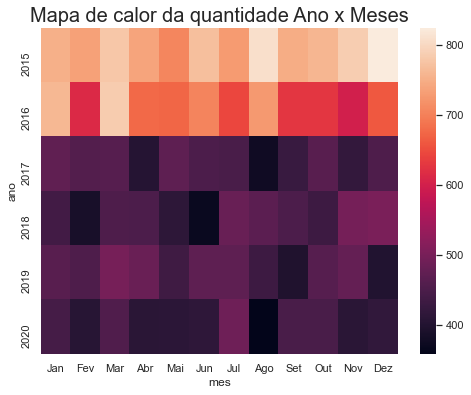

In [111]:
plt.figure(figsize=(8,6))
plt.title('Mapa de calor da quantidade Ano x Meses', fontsize='20')
sns.heatmap(matrix)

In [39]:
ano2015 = periodico.loc[2015]

Text(0, 0.5, 'Quantidade de voto')

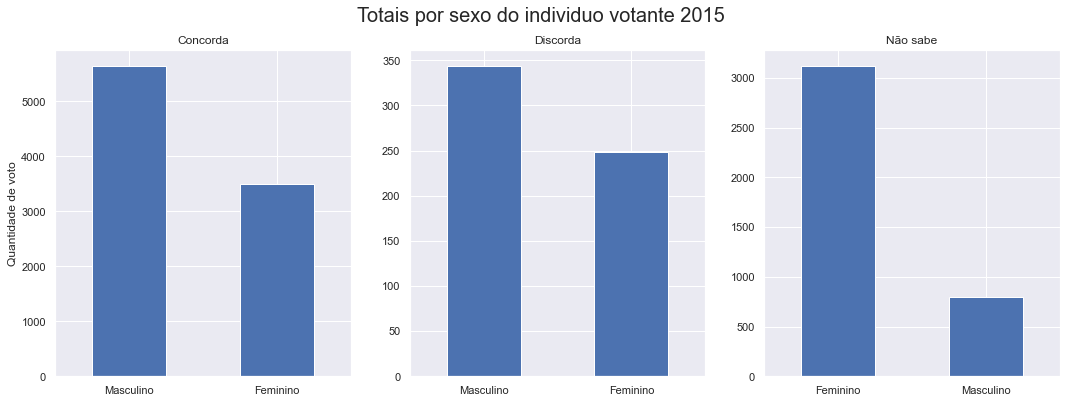

In [343]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

plt.suptitle("Totais por sexo do individuo votante 2015", fontsize='20')
ano2015[ano2015['voto'] == 'Concorda']['sexo'].value_counts().plot(rot=0,kind='bar', ax=ax[0], title="Concorda")
ano2015[ano2015['voto'] == 'Discorda']['sexo'].value_counts().plot(rot=0,kind='bar', ax=ax[1], title='Discorda')
ano2015[ano2015['voto'] == 'Não sabe']['sexo'].value_counts().plot(rot=0,kind='bar', ax=ax[2], title='Não sabe')
ax[0].set_ylabel('Quantidade de voto')
# plt.yticks([1000,2000,3000,4000,5000,6000], [])
# ax[1].set_yticks([])


[Text(0.5, 0, 'Faixa etária'), Text(0, 0.5, 'Quantidade de voto')]

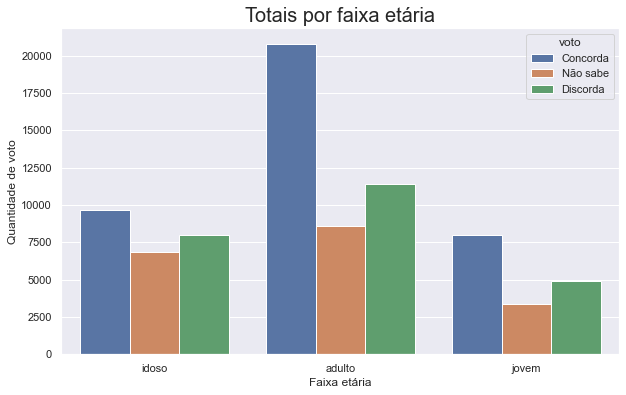

In [297]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Totais por faixa etária', fontsize='20')

sns.countplot(x='faixa_etaria', data=votos, hue='voto', ax=ax).set(xlabel='Faixa etária', ylabel='Quantidade de voto')

[Text(0.5, 0, 'Clube'), Text(0, 0.5, 'Quantidade de voto')]

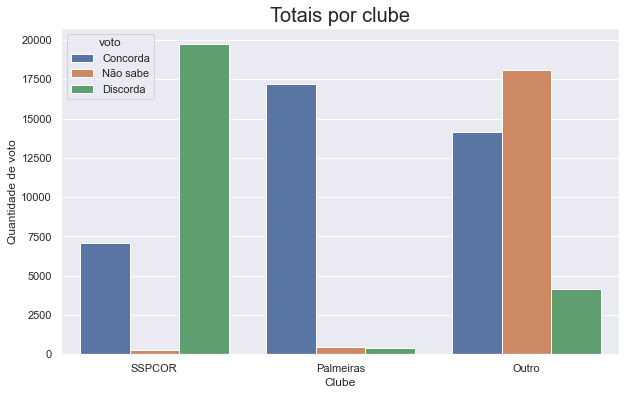

In [286]:
plt.figure(figsize=(10,6))
cp = sns.countplot(x='clube', data=votos, hue='voto')
cp.axes.set_title('Totais por clube', fontsize='20')
cp.set(xlabel='Clube', ylabel='Quantidade de voto')

In [277]:
# vdata2 votos até 2020
vdata2 = vdata[(vdata.index.year <= 2020)]['voto']

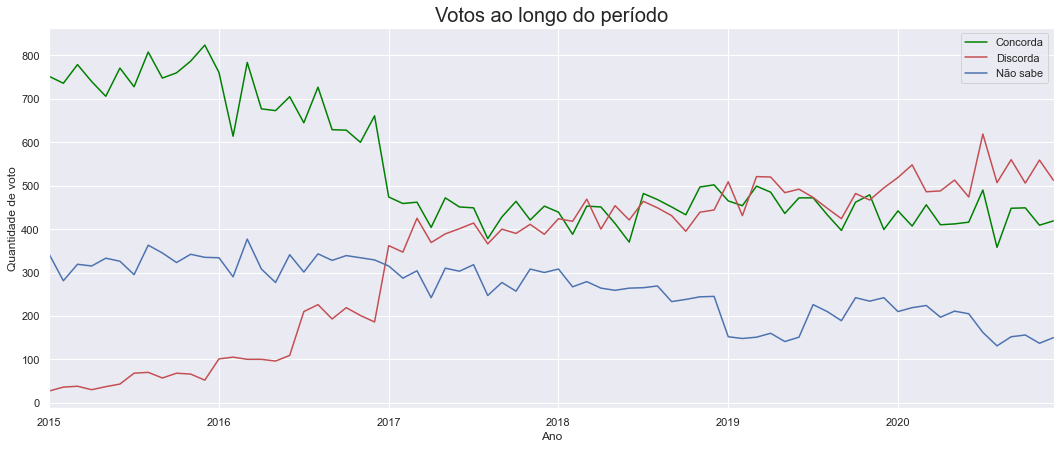

In [285]:
fig, ax = plt.subplots(figsize=(18,7))
ax.set_title('Votos ao longo do período', fontsize='20')
vdata2[vdata2=='Concorda'].resample('M').count().plot(kind='line', ax=ax, color='green', label='Concorda')
vdata2[vdata2=='Discorda'].resample('M').count().plot(kind='line', ax=ax, color='r', label='Discorda')
vdata2[vdata2=='Não sabe'].resample('M').count().plot(kind='line', ax=ax, label='Não sabe')

ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de voto')
plt.legend()

Text(0, 0.5, 'Quantidade de voto')

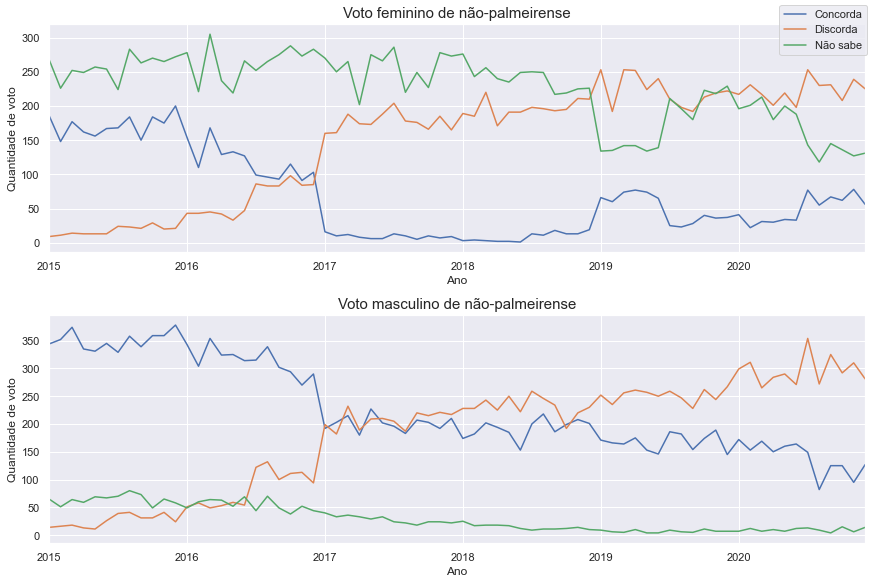

In [464]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(12,8))
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])


vdata[(vdata['voto']=='Concorda') & (vdata['sexo']=='Feminino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax1)
vdata[(vdata['voto']=='Discorda') & (vdata['sexo']=='Feminino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax1)
vdata[(vdata['voto']=='Não sabe') & (vdata['sexo']=='Feminino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax1)

vdata[(vdata['voto']=='Concorda') & (vdata['sexo']=='Masculino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax2)
vdata[(vdata['voto']=='Discorda') & (vdata['sexo']=='Masculino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax2)
vdata[(vdata['voto']=='Não sabe') & (vdata['sexo']=='Masculino') & (vdata['clube'] != 'Palmeiras')]['voto'].resample('M', kind='period').count().plot(kind='line', ax=ax2)
fig.legend(['Concorda', 'Discorda', 'Não sabe'])

ax1.set_title('Voto feminino de não-palmeirense', fontsize='15')
ax2.set_title('Voto masculino de não-palmeirense', fontsize='15')

ax1.set_xlabel('Ano')
ax2.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de voto')
ax2.set_ylabel('Quantidade de voto')

# ax.set_xlabel('Ano')
# ax.set_ylabel('Quantidade de voto')

# ax.set_title('Votos feminino no período', fontsize='20')

Text(0.5, 0, 'Ano')

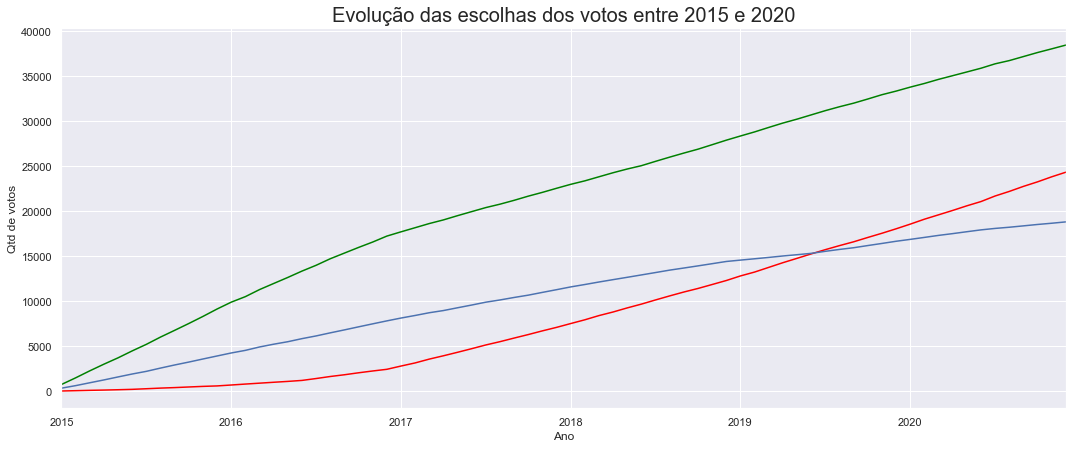

In [350]:
fig, ax = plt.subplots(figsize=(18,7))
plt.title('Evolução das escolhas dos votos entre 2015 e 2020', fontsize='20')
vdata2[vdata2=='Concorda'].resample('M').count().cumsum().plot(rot=0, kind='line', ax=ax, color='green')
vdata2[vdata2=='Discorda'].resample('M').count().cumsum().plot(rot=0, kind='line', ax=ax, color='red')
vdata2[vdata2=='Não sabe'].resample('M').count().cumsum().plot(rot=0, kind='line', ax=ax)
ax.set_ylabel('Qtd de votos')
ax.set_xlabel('Ano')

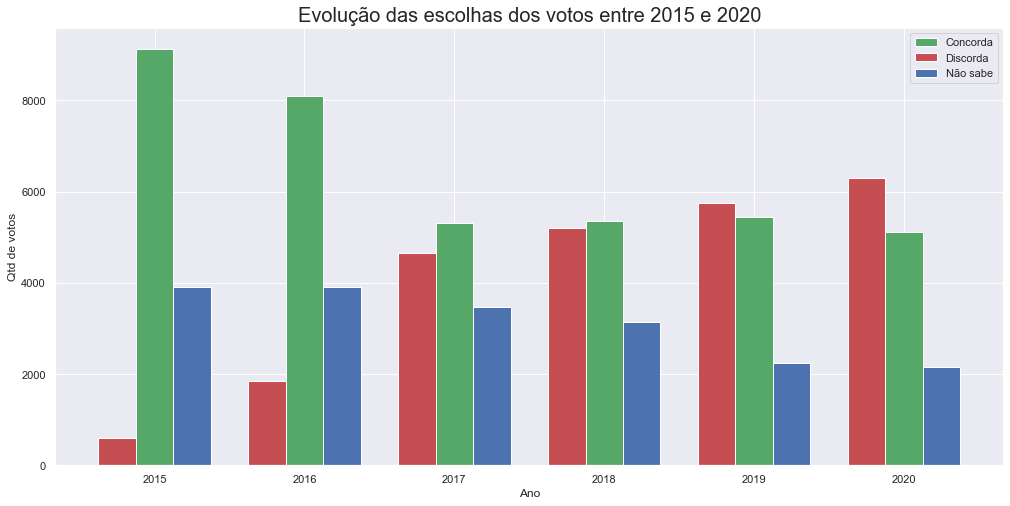

In [346]:
# usando o plt.bar()
fig, a = plt.subplots(figsize=(14,7))
plt.title('Evolução das escolhas dos votos entre 2015 e 2020', fontsize='20')
bar1 = plt.bar([2015,2016,2017,2018,2019,2020], vdata2[vdata2=='Concorda'].resample('Y', kind='period').count(), width = 0.25, label='Concorda', color='g')
bar2 = plt.bar([2015 -1/4,2016-1/4,2017-1/4,2018-1/4,2019-1/4,2020-1/4], vdata2[vdata2=='Discorda'].resample('Y', kind='period').count(),width = 0.25, label='Discorda', color='r')
bar3 = plt.bar([2015+1/4,2016+1/4,2017+1/4,2018+1/4,2019+1/4,2020+1/4], vdata2[vdata2=='Não sabe'].resample('Y', kind='period').count(),width = 0.25, label='Não sabe', color='b')
fig.tight_layout()
a.set_ylabel('Qtd de votos')
a.set_xlabel('Ano')
plt.legend(loc='best')
plt.show()

Text(0.5, 39.5, 'Ano')

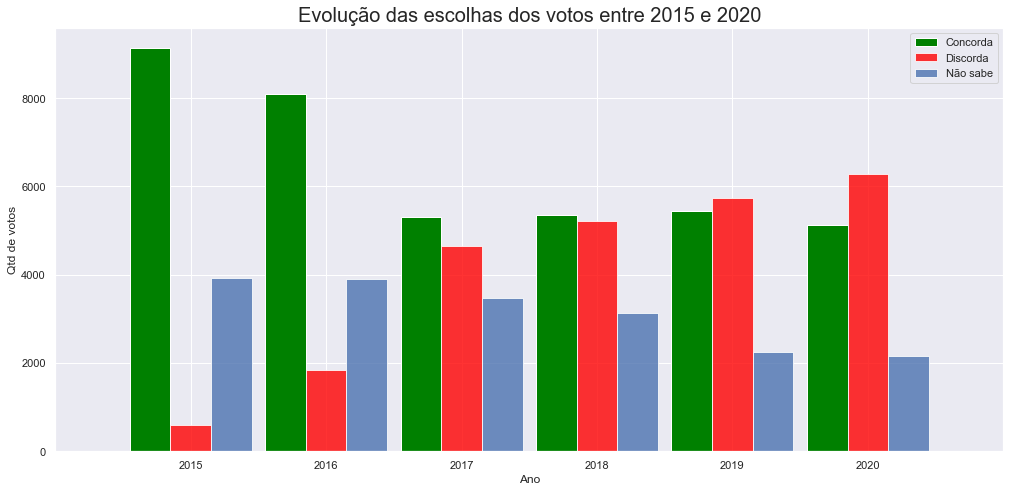

In [344]:
# usando o pandas.plot(kind='bar')
fig, a = plt.subplots(figsize=(14,7))

plt.title('Evolução das escolhas dos votos entre 2015 e 2020', fontsize='20')
vdata2[vdata2=='Concorda'].resample('Y', kind='period').count().plot(label='Concorda', rot=0, kind='bar', ax=a, position=0, color='green', width=-0.3, align='edge').legend(loc='best')
vdata2[vdata2=='Discorda'].resample('Y', kind='period').count().plot(label='Discorda',rot=0, kind='bar', ax=a, position=1, color='red', alpha=0.8, width=-0.3, align='edge').legend(loc='best')
vdata2[vdata2=='Não sabe'].resample('Y', kind='period').count().plot(label='Não sabe',rot=0, kind='bar', ax=a, position=2, alpha=0.8, width=-0.3, align='edge').legend(loc='best')
fig.tight_layout()
a.set_xlim(-1,6)
a.set_ylabel('Qtd de votos')
a.set_xlabel('Ano')

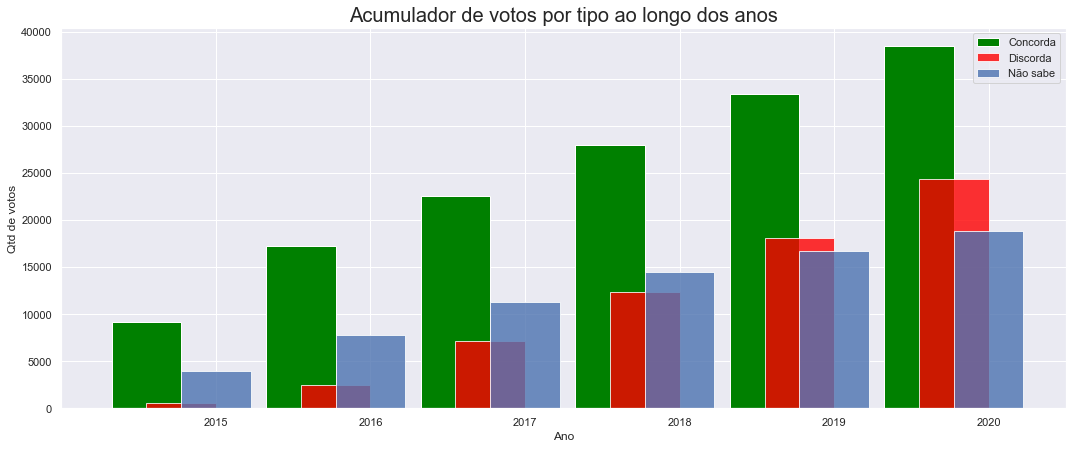

In [351]:
fig, axes = plt.subplots(figsize=(18,7))
plt.title('Acumulador de votos por tipo ao longo dos anos', fontsize='20')

vdata2[vdata2=='Concorda'].resample('Y', kind='period').count().cumsum().plot(rot=0, kind='bar', ax=axes, position=0, color='green', width=-0.45, align='edge', label='Concorda')
vdata2[vdata2=='Discorda'].resample('Y', kind='period').count().cumsum().plot(rot=0, kind='bar', ax=axes, position=0.5, color='red', alpha=0.8, width=-0.45, align='edge', label='Discorda')
vdata2[vdata2=='Não sabe'].resample('Y', kind='period').count().cumsum().plot(rot=0, kind='bar', ax=axes, position=1, alpha=0.8, width=-0.45, align='edge', label='Não sabe')
axes.set_xlabel('Ano')
axes.set_ylabel('Qtd de votos')
axes.set_xlim(-1,5.5)
plt.legend()

In [356]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [485]:
vdata[(vdata['sexo']=='Masculino') & (vdata['clube']=='SSPCOR')]['voto'].resample('Y', kind='period').count().iplot(kind='line', title='Voto masculino dos clube Santos FC, São Paulo FC e SC Corinthians')

In [358]:
columns = ['concorda', 'discorda', 'naosabe']
so_votos = pd.DataFrame(vdata2[vdata2=='Concorda'].resample('Y', kind='period').count().cumsum())
so_votos['discorda'] = vdata2[vdata2=='Discorda'].resample('Y', kind='period').count().cumsum()
so_votos['naosabe'] = vdata2[vdata2=='Não sabe'].resample('Y', kind='period').count().cumsum()
so_votos.columns = columns
so_votos.head()

,concorda,discorda,naosabe
data,,,
2015,9139,592,3919
2016,17243,2438,7820
2017,22558,7100,11288
2018,27905,12308,14423
2019,33358,18054,16669


In [359]:
so_votos.index = ['2015', '2016', '2017', '2018', '2019', '2020']
so_votos.index

Index(['2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

In [46]:
import plotly.express as px

fig = px.bar(so_votos, barmode="group", orientation='h', title='Acumulado de votos no período de 2015 a 2020', x=['concorda', 'discorda', 'naosabe'], y=so_votos.index, labels={'value':'Votos', 'index':'Ano', 'variable': 'Legenda'})

fig.show()

## <center> Preparando plot com slider </center>

In [360]:

concorda_mensal=vdata[vdata=='Concorda']['voto'].resample('M').count()
discorda_mensal=vdata[vdata=='Discorda']['voto'].resample('M').count()
naosabe_mensal=vdata[vdata=='Não sabe']['voto'].resample('M').count()
print(type(concorda_mensal))

<class 'pandas.core.series.Series'>


In [380]:
# plot com slider
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=concorda_mensal.index, y=concorda_mensal, name='Concorda',line=dict(color='green'))
)
fig.add_trace(
    go.Scatter(x=discorda_mensal.index, y=discorda_mensal, name="Discorda", line={'color':'red'}),
)
fig.add_trace(
    go.Scatter(x=naosabe_mensal.index, y=naosabe_mensal, name='Não sabe', line=dict(color='blue'))
)

# Set title
# fig.update_layout(    
#     title_text="Votos mensais por tipo"
# )
fig.update_layout(    
    title={
        'text': "Votos por tipo no período",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
# Add range slider
fig.update_layout(
    yaxis=dict(title='Quantidade de voto'),
    xaxis=dict(title='Ano',
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()